In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html 
# Accede a datos financieros públicos de Internet

In [2]:
startdate = date(2019,9,10)
end_date  = date(2019,10,9)

#df= pdr.DataReader('GE', data_source='yahoo', start=startdate, end=end_date)
#df = pdr.get_data_yahoo('GE', start='2019-09-10', end='2019-10-09')
df = pdr.DataReader('GE', data_source='stooq', start=startdate, end=end_date) # "GE", siglas empresa en la bolsa
df.head()
# Volume; cant de transacciones al día

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-09,65.6743,66.0670,65.0416,65.9095,4.206320e+06
2019-10-08,66.9361,67.0926,65.2777,65.3565,5.801803e+06
2019-10-07,67.4872,68.2785,66.9361,67.5669,4.117431e+06
2019-10-04,67.9616,68.6722,67.4085,67.6466,6.653403e+06
2019-10-03,67.0946,68.7519,65.1213,68.7519,7.469592e+06


In [3]:
#df= pdr.DataReader('^DJI', 'stooq', '2020-1-1', '2024-3-11')
df = pdr.get_data_stooq('^DJI', '2020-1-1', '2024-3-11')# stooq.com
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-11,38667.21,38794.76,38483.25,38769.66,285909386.0
2024-03-08,38776.80,38971.15,38705.03,38722.69,325592316.0
2024-03-07,38784.30,38910.35,38730.13,38791.35,322501315.0
2024-03-06,38721.15,38858.13,38570.80,38661.05,335450319.0
2024-03-05,38906.98,38906.98,38457.83,38585.19,379728343.0


In [4]:
def get_stock(ticker, start, end):
    #data = pdr.DataReader(ticker, 'yahoo', start, end)
    data = pdr.get_data_stooq(ticker, start, end)
    data.insert(0, "Ticker", ticker)
    return data

ticker = 'DIS'
ini = date(2020,1,1)
fin = date.today()

df1 = get_stock(ticker, ini, fin)
df1.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-03-12,DIS,112.515,112.95,111.64,112.46,8084958
2024-03-11,DIS,110.090,112.91,110.03,112.31,8794307
2024-03-08,DIS,110.180,111.31,109.34,110.32,10009185
2024-03-07,DIS,110.700,111.08,109.20,110.18,8609290
2024-03-06,DIS,113.080,113.30,109.25,110.06,14743882


___
### Pivot

In [5]:
# creating a dataframe
df = pd.DataFrame({
   'A': ['John', 'Boby', 'Mina'],
   'B': ['Masters', 'Graduate', 'Graduate'],
   'C': [27, 23, 21],
})
df

,A,B,C
0,John,Masters,27
1,Boby,Graduate,23
2,Mina,Graduate,21


In [6]:
df.pivot(index='A', columns='B', values='C')

B,Graduate,Masters
A,,
Boby,23.0,NaN
John,NaN,27.0
Mina,21.0,NaN


#
___
#
# Análisis de cotizaciones de la bolsa

- SPY: índice S&P 500
- IYW: índice de capitalización bursátil de las BigTechs estadounidenses
- VT:  ...que invierte en empresas de todo el mundo
- DBA: que sigue la oferta y la demanda de productos agrícolas y sus precios
- TLT: índice de los bonos estadounidenses 
- PDBC: sigue la oferta y la demanda de otras materias primas y los precios
- IAU: Oro

In [7]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

def get_stock(ticker, start, end):
    data = pdr.get_data_stooq(ticker, start, end)
    data.insert(0, "Ticker", ticker)
    return data

In [8]:
ini = date(2020,1,1)
fin = date.today()

SPY = get_stock("SPY", ini, fin)
IYW = get_stock("IYW", ini, fin)
VT  = get_stock("VT",  ini, fin)
DBA = get_stock("DBA", ini, fin)
TLT = get_stock("TLT", ini, fin)
PDBC= get_stock("PDBC",ini, fin)
IAU = get_stock("IAU", ini, fin)

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1055 entries, 2024-03-12 to 2020-01-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1055 non-null   object 
 1   Open    1055 non-null   float64
 2   High    1055 non-null   float64
 3   Low     1055 non-null   float64
 4   Close   1055 non-null   float64
 5   Volume  1055 non-null   float64
dtypes: float64(5), object(1)
memory usage: 57.7+ KB


In [9]:
SPY.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-03-12,SPY,513.45,517.3800,510.8600,516.78,73114439.0
2024-03-11,SPY,510.48,511.8800,508.5000,511.28,62557183.0
2024-03-08,SPY,515.46,518.2201,511.1300,511.72,86532535.0
2024-03-07,SPY,513.14,515.8900,509.8053,514.81,58652085.0
2024-03-06,SPY,510.55,512.0690,508.4200,509.75,68382367.0


In [10]:
SPY.pivot(columns="Ticker", values="Close").head()

Ticker,SPY
Date,
2020-01-02,311.097
2020-01-03,308.737
2020-01-06,309.907
2020-01-07,309.044
2020-01-08,310.681


In [11]:
#Execute pivoting per data frame
SPY = SPY.pivot(columns="Ticker", values="Close")
IYW = IYW.pivot(columns="Ticker", values="Close")
VT  =  VT.pivot(columns="Ticker", values="Close")
DBA = DBA.pivot(columns="Ticker", values="Close")
TLT = TLT.pivot(columns="Ticker", values="Close")
PDBC=PDBC.pivot(columns="Ticker", values="Close")
IAU = IAU.pivot(columns="Ticker", values="Close")

In [12]:
stock = pd.concat([SPY, IYW, VT, DBA, TLT,PDBC, IAU],
                  axis=1, join='outer')
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


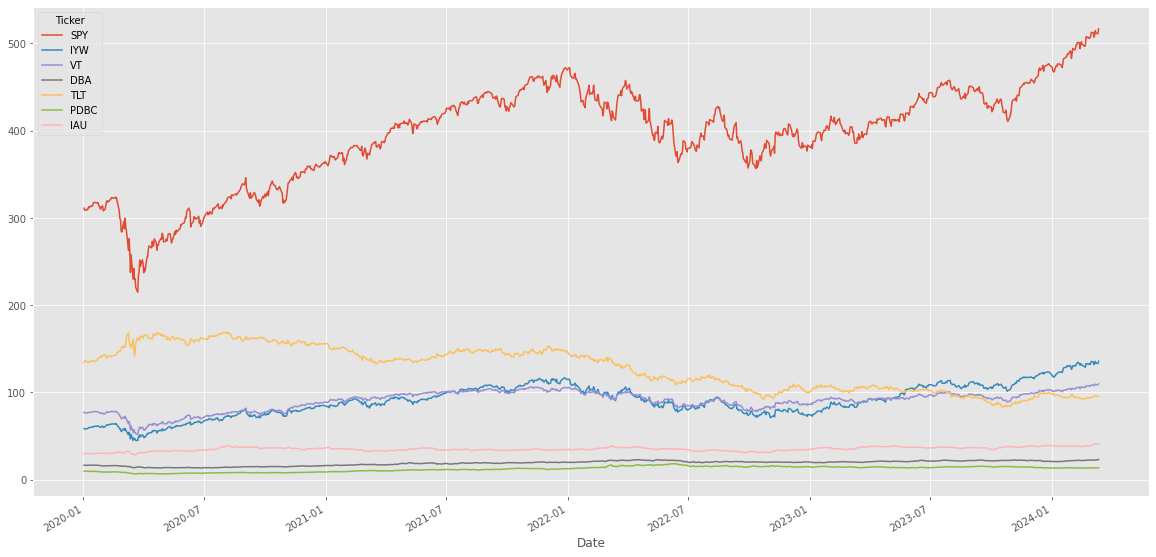

In [13]:
plt.style.use('ggplot')
stock.plot(figsize = (20,10))
plt.show()

In [14]:
covid = stock['2020-2-1':'2020-7-31']
covid.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-02-03,310.353,60.5678,75.4707,15.62,142.707,8.53137,30.12
2020-02-04,315.093,61.9594,76.7137,15.65,140.785,8.54283,29.72
2020-02-05,318.742,62.2328,77.4101,15.66,139.241,8.66272,29.76
2020-02-06,319.813,62.9102,77.6545,15.77,139.869,8.70327,29.94
2020-02-07,318.098,62.4364,77.0237,15.84,141.611,8.66272,30.00


In [15]:
x = covid.index.values
s_y = covid[['SPY']].values
i_y = covid[['IAU']].values
d_y = covid[['DBA']].values
t_y = covid[['TLT']].values
x[:5], s_y[:5], len(x), len(s_y)

(array(['2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
        '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
        '2020-02-07T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([[310.353],
        [315.093],
        [318.742],
        [319.813],
        [318.098]]),
 126,
 126)

Text(0.5, 0.98, 'Covid 19')

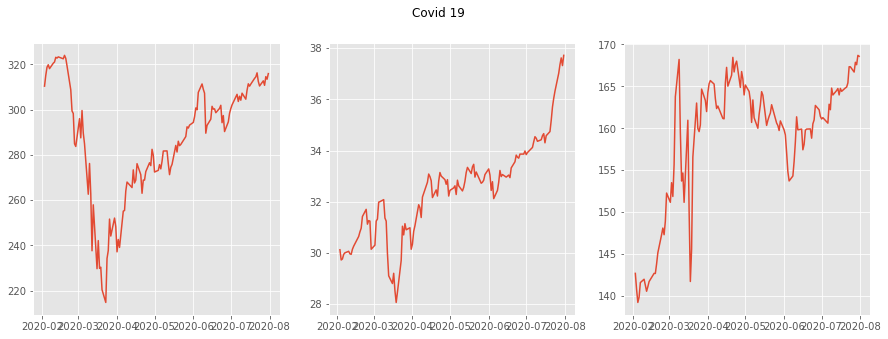

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)
fig.suptitle('Covid 19')

In [17]:
ticker = 'PDBC' # fondo de gestión activa, que genera ingresos a través de la distribución de dividendos.
ini = date(2020,1,1)
fin = date.today()
df2 = get_stock(ticker, ini, fin)
df2.head()

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2024-03-12,PDBC,13.45,13.52,13.420,13.46,3389814.0
2024-03-11,PDBC,13.39,13.52,13.330,13.50,3756475.0
2024-03-08,PDBC,13.40,13.40,13.310,13.39,3028777.0
2024-03-07,PDBC,13.40,13.49,13.368,13.43,3123349.0
2024-03-06,PDBC,13.40,13.47,13.370,13.39,2504365.0


In [18]:
# Metodo 1
# df2[['Close','Volume']]

# Método 2
# df2.iloc[:, [4,5]]

# Método 3
df2.drop(['Ticker','High','Low','Open',],
         axis=1, inplace=True)
df2.head()

,Close,Volume
Date,,
2024-03-12,13.46,3389814.0
2024-03-11,13.50,3756475.0
2024-03-08,13.39,3028777.0
2024-03-07,13.43,3123349.0
2024-03-06,13.39,2504365.0


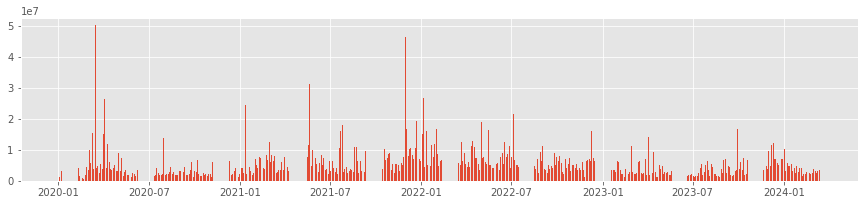

In [19]:
x = df2.index
y = df2['Volume']

plt.figure(figsize = (15,3))
plt.bar(x,y)
plt.show()

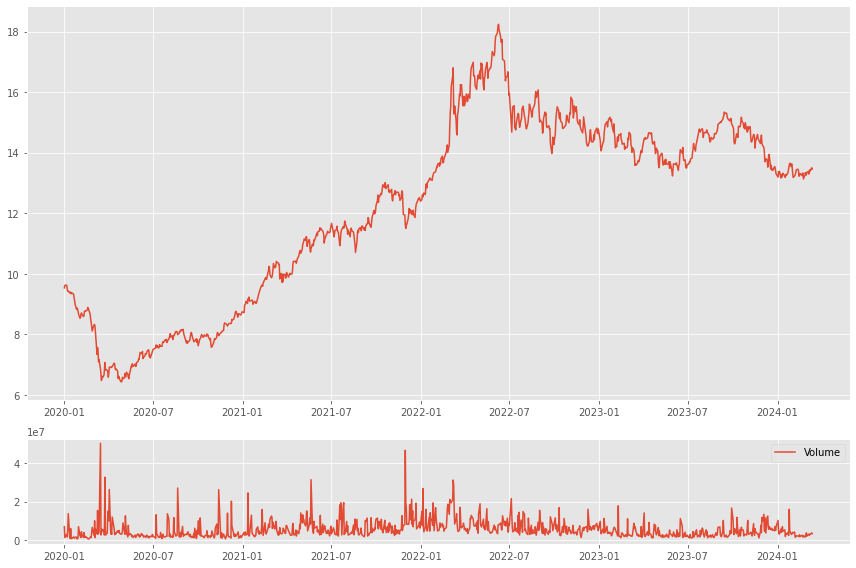

In [20]:
x = df2.index.values
y = df2['Close'].values
z = df2['Volume'].values

fig = plt.figure(figsize=(12, 8))

top_grid = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bot_grid = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

top_grid.plot(x, y, label='Close')
bot_grid.plot(x, z, label='Volume')

plt.tight_layout()
plt.legend()
plt.show()

In [21]:
stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,311.097,58.5205,77.0139,16.50,134.123,9.53455,29.22
2020-01-03,308.737,57.9349,76.3184,16.31,136.194,9.61388,29.62
2020-01-06,309.907,58.2920,76.5998,16.35,135.418,9.62622,29.92
2020-01-07,309.044,58.3140,76.3644,16.39,134.751,9.60859,30.04
2020-01-08,310.681,58.8967,76.6755,16.31,133.855,9.47725,29.82


In [22]:
stock['SPY'].head()

Date
2020-01-02    311.097
2020-01-03    308.737
2020-01-06    309.907
2020-01-07    309.044
2020-01-08    310.681
Name: SPY, dtype: float64

In [23]:
stock['SPY'].shift(1).head()

Date
2020-01-02        NaN
2020-01-03    311.097
2020-01-06    308.737
2020-01-07    309.907
2020-01-08    309.044
Name: SPY, dtype: float64

In [24]:
# Variación de precio diario
spy_daily_pc = (stock['SPY'] / stock['SPY'].shift(1) - 1 ) * 100
spy_daily_pc.head() 

Date
2020-01-02         NaN
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

<AxesSubplot:xlabel='Date'>

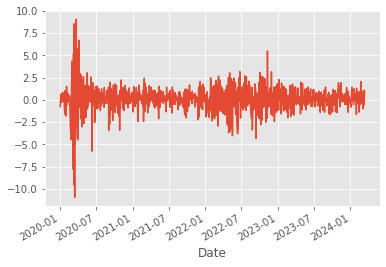

In [25]:
spy_daily_pc.plot()

In [26]:
spy_daily_pc = (stock['SPY'] - stock['SPY'].shift(1)) / stock['SPY'].shift(1) * 100
spy_daily_pc.head()

Date
2020-01-02         NaN
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

In [27]:
spy_daily_pc.iloc[0] = 0
spy_daily_pc.head()

Date
2020-01-02    0.000000
2020-01-03   -0.758606
2020-01-06    0.378963
2020-01-07   -0.278471
2020-01-08    0.529698
Name: SPY, dtype: float64

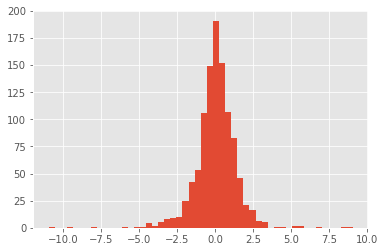

In [28]:
plt.hist(spy_daily_pc, bins=50)
plt.show()

In [29]:
stock_daily_pc = (stock - stock.shift(1)) / stock.shift(1) * 100
stock_daily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,0.378963,0.616381,0.368718,0.245248,-0.569775,0.128356,1.012829
2020-01-07,-0.278471,0.037741,-0.307312,0.244648,-0.492549,-0.183146,0.401070
2020-01-08,0.529698,0.999245,0.407389,-0.488103,-0.664930,-1.366902,-0.732357


In [30]:
stock_daily_cumsum = stock_daily_pc.cumsum()
stock_daily_cumsum.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.758606,-1.000675,-0.903084,-1.151515,1.544105,0.832027,1.368925
2020-01-06,-0.379643,-0.384293,-0.534365,-0.906267,0.974330,0.960383,2.381755
2020-01-07,-0.658113,-0.346552,-0.841677,-0.661619,0.481781,0.777237,2.782824
2020-01-08,-0.128415,0.652693,-0.434288,-1.149721,-0.183150,-0.589665,2.050467


<AxesSubplot:xlabel='Date'>

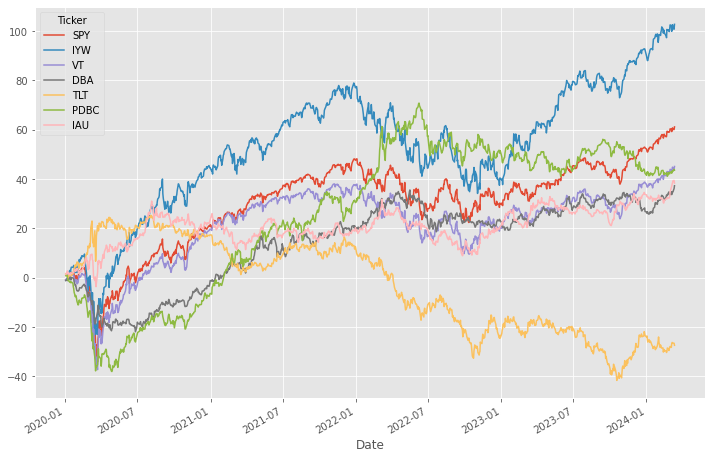

In [31]:
stock_daily_cumsum.plot(figsize=(12,8))

In [32]:
stock_corr = stock_daily_cumsum.corr()
stock_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.971868,0.974633,0.880194,-0.613711,0.808587,0.659060
IYW,0.971868,1.000000,0.945919,0.806550,-0.569174,0.703958,0.731056
VT,0.974633,0.945919,1.000000,0.793745,-0.472938,0.710881,0.617715
DBA,0.880194,0.806550,0.793745,1.000000,-0.807055,0.966854,0.525613
TLT,-0.613711,-0.569174,-0.472938,-0.807055,1.000000,-0.813219,-0.447978
PDBC,0.808587,0.703958,0.710881,0.966854,-0.813219,1.000000,0.456336
IAU,0.659060,0.731056,0.617715,0.525613,-0.447978,0.456336,1.000000


/tmp/ipykernel_2844/3518476888.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


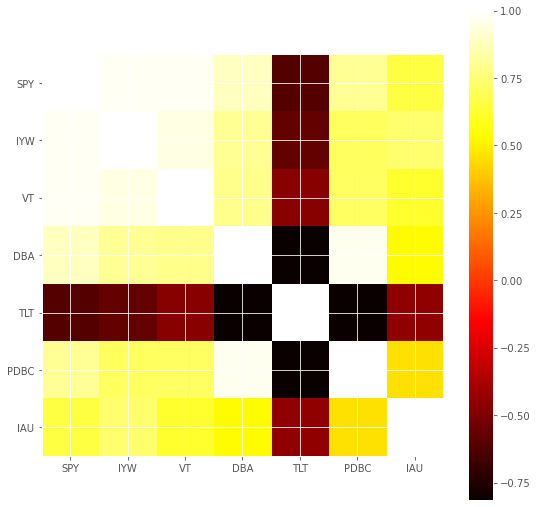

In [33]:
x = range(len(stock_corr))
y = stock_corr.columns

plt.imshow(stock_corr, cmap ='hot', interpolation ='none')
plt.colorbar() # correlación
plt.xticks(x, y)
plt.yticks(x, y)
plt.gcf().set_size_inches(9,9)

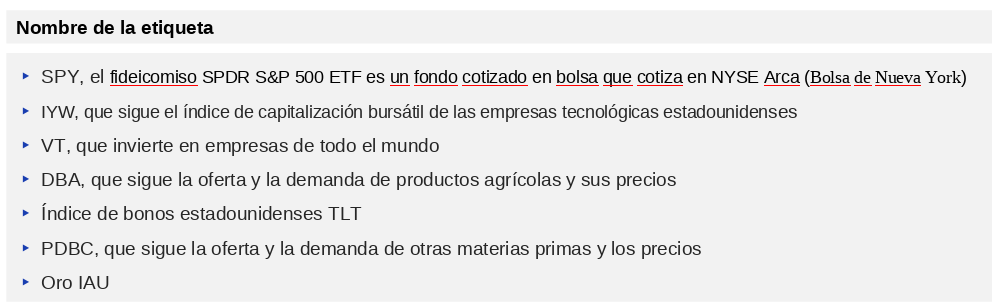

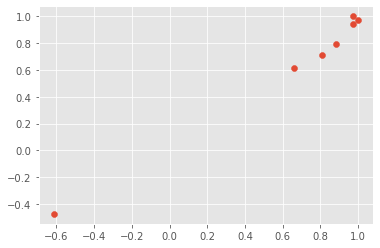

In [34]:
iyw = stock_corr.IYW
spy = stock_corr.SPY
vt  = stock_corr.VT

plt.scatter(spy, vt) # G. dispersión

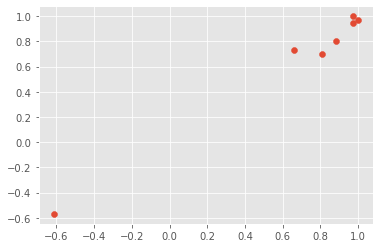

In [35]:
plt.scatter(spy, iyw)

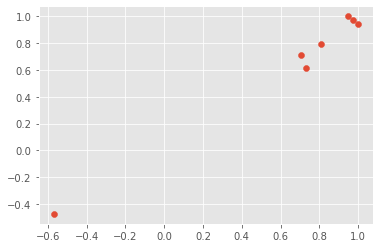

In [36]:
plt.scatter(iyw, vt)

In [43]:
# Análisis de variación del precio de las acciones durante un periodo determinado

periods = 75
vol = stock_daily_pc.rolling(window=periods).std()
vol.tail()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2024-03-06,0.653131,1.105091,0.640703,0.893058,1.001123,0.981422,0.782716
2024-03-07,0.659979,1.118912,0.647395,0.889880,0.992602,0.944333,0.775368
2024-03-08,0.666094,1.133678,0.649896,0.889658,0.992120,0.925427,0.779932
2024-03-11,0.663028,1.126637,0.648622,0.902960,0.990338,0.921507,0.779075
2024-03-12,0.669857,1.141396,0.653830,0.911790,0.995862,0.919016,0.783412


<AxesSubplot:xlabel='Date'>

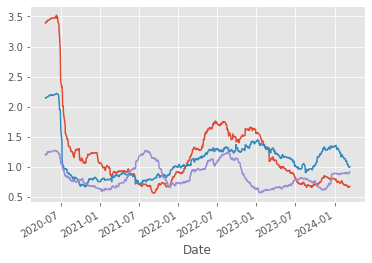

In [44]:
vol["SPY"].plot()
vol["TLT"].plot()
vol["DBA"].plot()